In [3]:
import pandas as pd

df = pd.read_csv('ResumeData.csv')
df

,resume_Text,job_description_text,decision,job_id
0,SummaryForward-thinking Project Management Pro...,Experienced in Salesforce Industries Communic...,0,0
1,Professional ProfileExpert in Functional Testi...,Experienced in Salesforce Industries Communic...,0,0
2,Professional SummaryA professional position in...,Experienced in Salesforce Industries Communic...,0,0
3,SummaryWorking with a $100 million company uti...,Experienced in Salesforce Industries Communic...,0,0
4,"Professional SummaryDependable, results-driven...",Experienced in Salesforce Industries Communic...,0,0
...,...,...,...,...
5199,SummarySelf-motivated Data Analyst offering 8 ...,"Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5200,"Career OverviewDedicated, personable, and moti...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5201,"SummaryA results driven, detail-oriented data ...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5202,SummaryDedi100 Montgomery St. 10th Floorted He...,"Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189


<ipython-input-6-93d8569ca516>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='pastel')


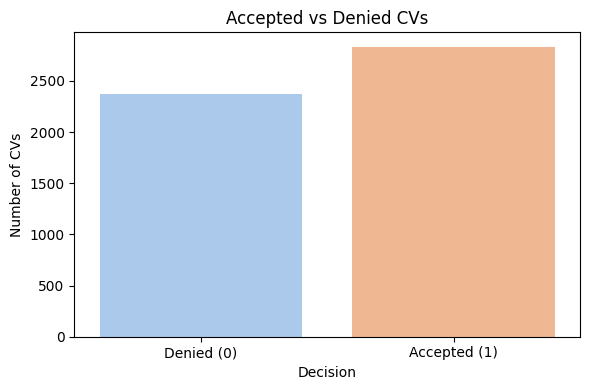

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many were accepted (1) vs denied (0)
decision_counts = df['decision'].value_counts().sort_index()

# Map labels
labels = ['Denied (0)', 'Accepted (1)']
counts = [decision_counts[0], decision_counts[1]]

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette='pastel')
plt.title('Accepted vs Denied CVs')
plt.ylabel('Number of CVs')
plt.xlabel('Decision')
plt.tight_layout()
plt.show()


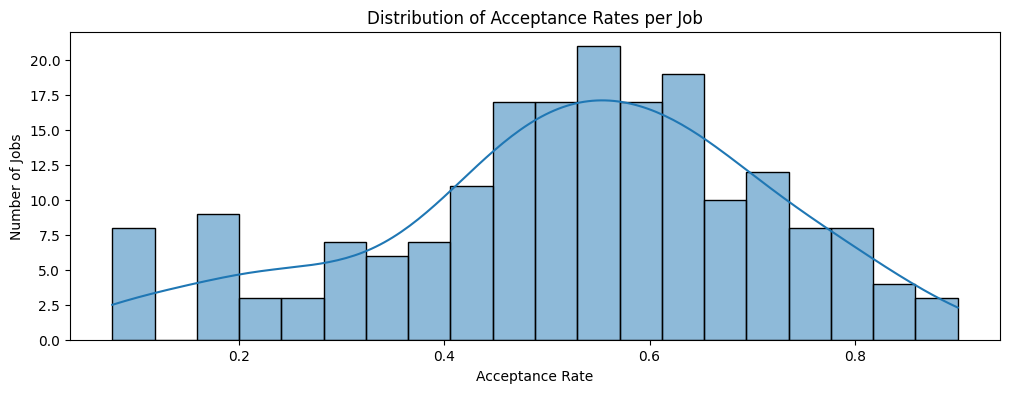

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

acceptance_rate = df.groupby('job_id')['decision'].mean()

plt.figure(figsize=(12, 4))
sns.histplot(acceptance_rate, bins=20, kde=True)
plt.title('Distribution of Acceptance Rates per Job')
plt.xlabel('Acceptance Rate')
plt.ylabel('Number of Jobs')
plt.show()


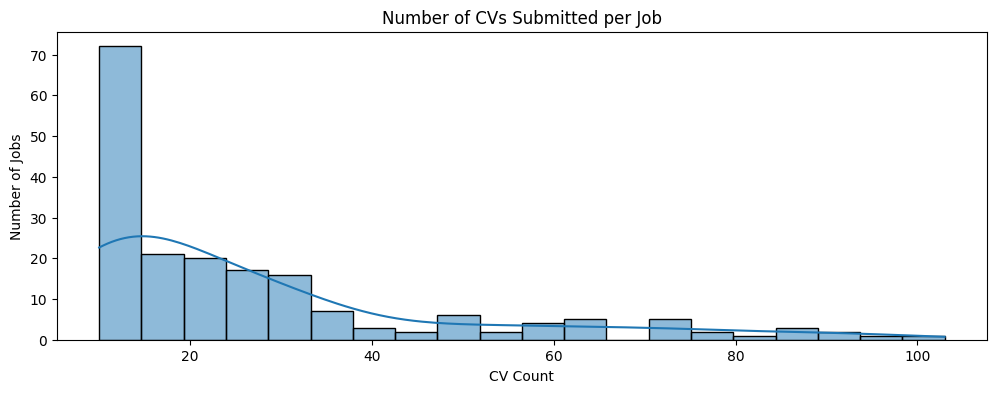

In [10]:
job_counts = df['job_id'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sns.histplot(job_counts, bins=20, kde=True)
plt.title('Number of CVs Submitted per Job')
plt.xlabel('CV Count')
plt.ylabel('Number of Jobs')
plt.show()


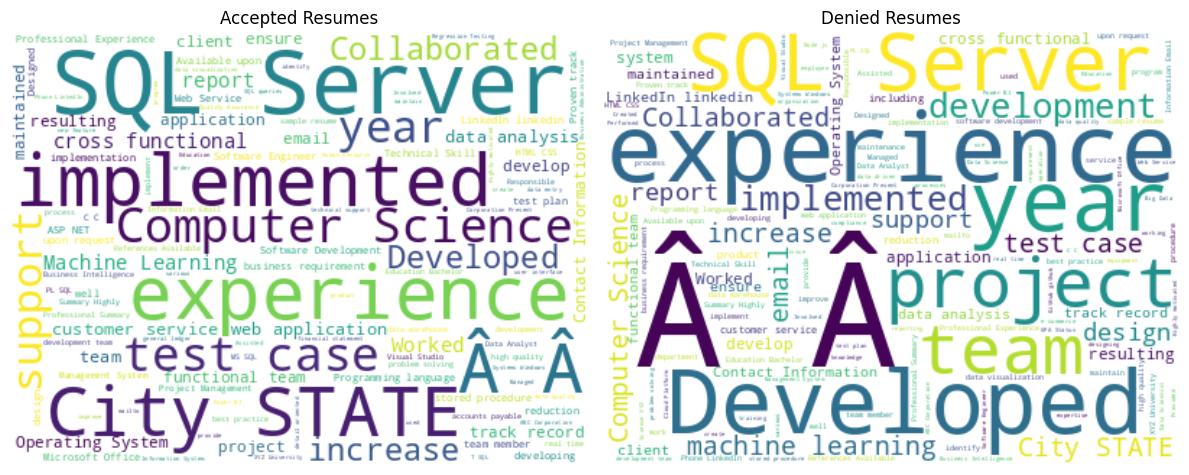

In [11]:
from wordcloud import WordCloud

# Combine text for accepted resumes
accepted_text = ' '.join(df[df['decision'] == 1]['resume_Text'])
denied_text = ' '.join(df[df['decision'] == 0]['resume_Text'])

# Generate and show
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
wordcloud_accepted = WordCloud(width=400, height=300, background_color='white').generate(accepted_text)
plt.imshow(wordcloud_accepted, interpolation='bilinear')
plt.axis('off')
plt.title('Accepted Resumes')

plt.subplot(1, 2, 2)
wordcloud_denied = WordCloud(width=400, height=300, background_color='white').generate(denied_text)
plt.imshow(wordcloud_denied, interpolation='bilinear')
plt.axis('off')
plt.title('Denied Resumes')

plt.tight_layout()
plt.show()


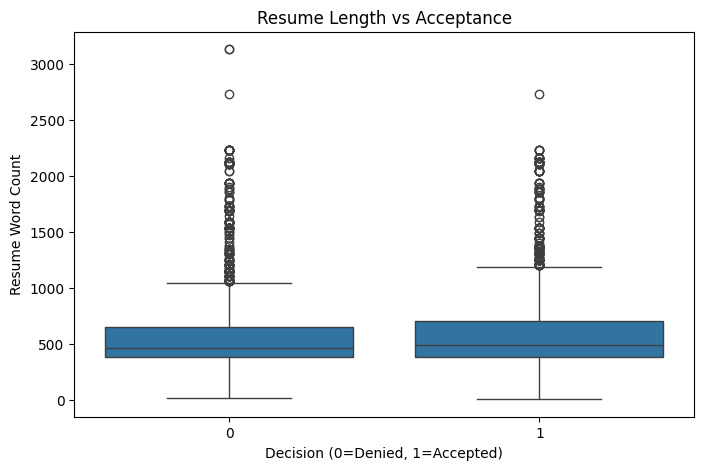

In [13]:
df['resume_length'] = df['resume_Text'].str.split().apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(x='decision', y='resume_length', data=df)
plt.title('Resume Length vs Acceptance')
plt.xlabel('Decision (0=Denied, 1=Accepted)')
plt.ylabel('Resume Word Count')
plt.show()


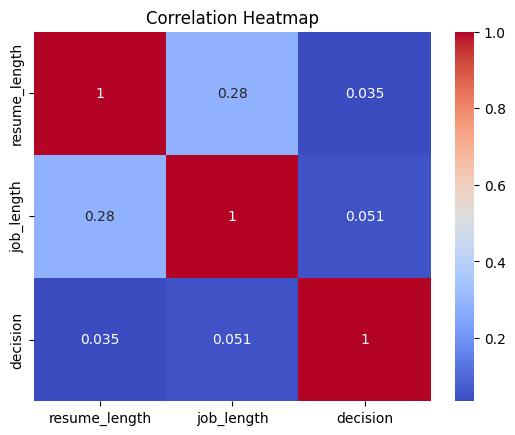

In [15]:
# Example: create features
df['job_length'] = df['job_description_text'].str.split().apply(len)
df['resume_length'] = df['resume_Text'].str.split().apply(len)

sns.heatmap(df[['resume_length', 'job_length', 'decision']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


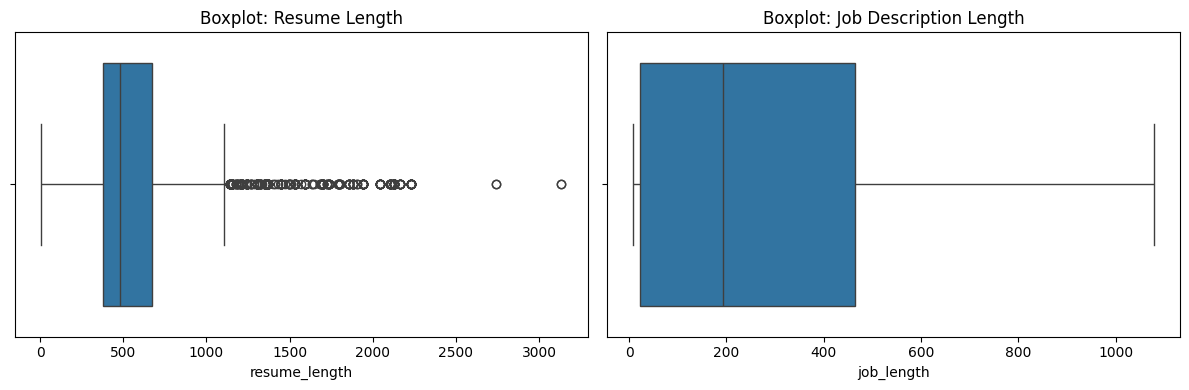

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['resume_length'])
plt.title('Boxplot: Resume Length')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['job_length'])
plt.title('Boxplot: Job Description Length')

plt.tight_layout()
plt.show()


In [19]:
Q1 = df['resume_length'].quantile(0.25)
Q3 = df['resume_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
refined_df = df[
    (df['resume_length'] >= lower_bound) &
    (df['resume_length'] <= upper_bound)
]


In [21]:
refined_df

,resume_Text,job_description_text,decision,job_id,resume_length,job_length
0,SummaryForward-thinking Project Management Pro...,Experienced in Salesforce Industries Communic...,0,0,498,108
1,Professional ProfileExpert in Functional Testi...,Experienced in Salesforce Industries Communic...,0,0,669,108
2,Professional SummaryA professional position in...,Experienced in Salesforce Industries Communic...,0,0,630,108
3,SummaryWorking with a $100 million company uti...,Experienced in Salesforce Industries Communic...,0,0,643,108
4,"Professional SummaryDependable, results-driven...",Experienced in Salesforce Industries Communic...,0,0,790,108
...,...,...,...,...,...,...
5198,"Professional SummaryDependable, results-driven...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189,790,1079
5199,SummarySelf-motivated Data Analyst offering 8 ...,"Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189,1073,1079
5200,"Career OverviewDedicated, personable, and moti...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189,489,1079
5201,"SummaryA results driven, detail-oriented data ...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189,608,1079


In [22]:
refined_df.drop(['resume_length', 'job_length'], axis=1, inplace=True)

<ipython-input-22-459acc1afa76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df.drop(['resume_length', 'job_length'], axis=1, inplace=True)


In [23]:
refined_df

,resume_Text,job_description_text,decision,job_id
0,SummaryForward-thinking Project Management Pro...,Experienced in Salesforce Industries Communic...,0,0
1,Professional ProfileExpert in Functional Testi...,Experienced in Salesforce Industries Communic...,0,0
2,Professional SummaryA professional position in...,Experienced in Salesforce Industries Communic...,0,0
3,SummaryWorking with a $100 million company uti...,Experienced in Salesforce Industries Communic...,0,0
4,"Professional SummaryDependable, results-driven...",Experienced in Salesforce Industries Communic...,0,0
...,...,...,...,...
5198,"Professional SummaryDependable, results-driven...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5199,SummarySelf-motivated Data Analyst offering 8 ...,"Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5200,"Career OverviewDedicated, personable, and moti...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5201,"SummaryA results driven, detail-oriented data ...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189


In [24]:
refined_df['job_id'] = refined_df['job_id'].astype('category').cat.codes

<ipython-input-24-1eb052837c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['job_id'] = refined_df['job_id'].astype('category').cat.codes


In [25]:
refined_df

,resume_Text,job_description_text,decision,job_id
0,SummaryForward-thinking Project Management Pro...,Experienced in Salesforce Industries Communic...,0,0
1,Professional ProfileExpert in Functional Testi...,Experienced in Salesforce Industries Communic...,0,0
2,Professional SummaryA professional position in...,Experienced in Salesforce Industries Communic...,0,0
3,SummaryWorking with a $100 million company uti...,Experienced in Salesforce Industries Communic...,0,0
4,"Professional SummaryDependable, results-driven...",Experienced in Salesforce Industries Communic...,0,0
...,...,...,...,...
5198,"Professional SummaryDependable, results-driven...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5199,SummarySelf-motivated Data Analyst offering 8 ...,"Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5200,"Career OverviewDedicated, personable, and moti...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189
5201,"SummaryA results driven, detail-oriented data ...","Your Journey at Crowe Starts Here:\nAt Crowe, ...",1,189


In [26]:
refined_df.to_csv('cleaned_data.csv', index=False)